In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


#from google.colab import files




In [2]:
#uploaded = files.upload()

In [3]:
#uploaded_2 = files.upload()

In [4]:
math_data = pd.read_csv("math_success.csv")
portuguese_data = pd.read_csv("portuguese_success.csv")

math_df = pd.DataFrame(math_data)
portuguese_df = pd.DataFrame(portuguese_data)

In [5]:
math_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
math_df["g3"] = math_df["g3"].astype(int)
math_df["pass_fail"] = (math_df["g3"] >= 10).astype(int)


In [7]:
math_df = math_df.drop(columns = "g3")

In [8]:
math_df = pd.get_dummies(math_df)

In [9]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

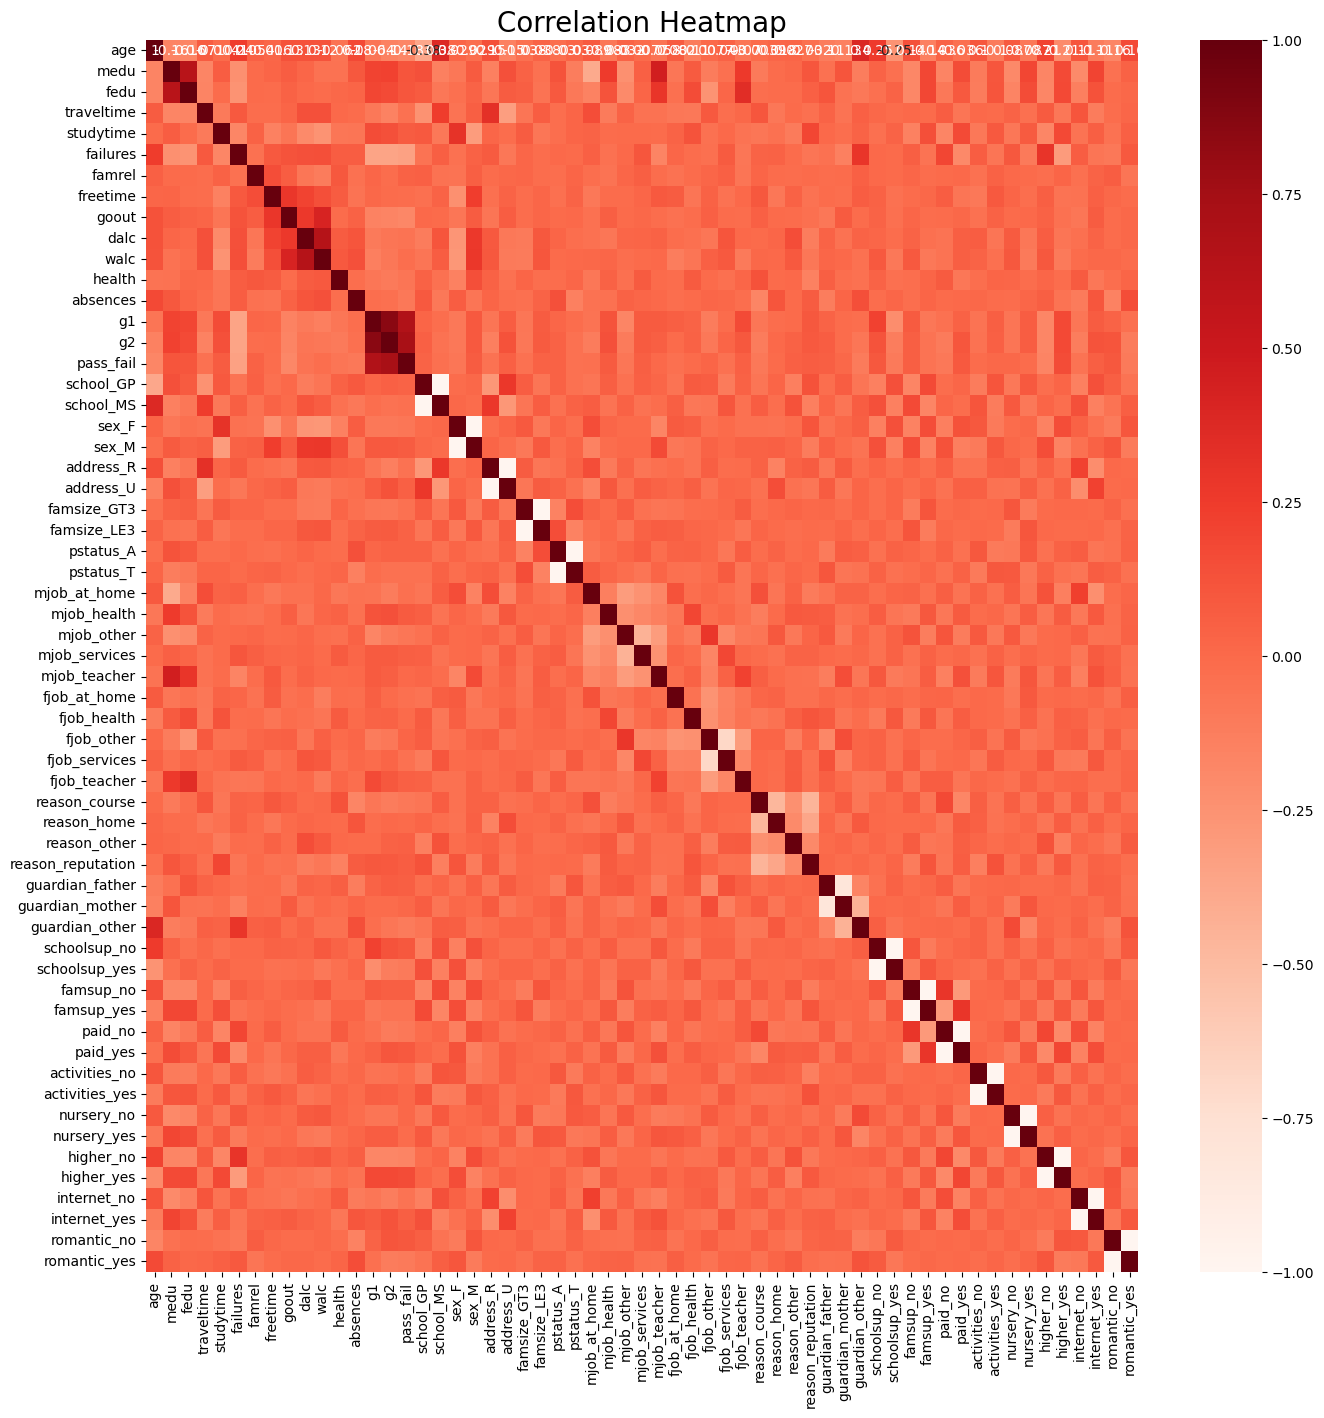

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = math_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

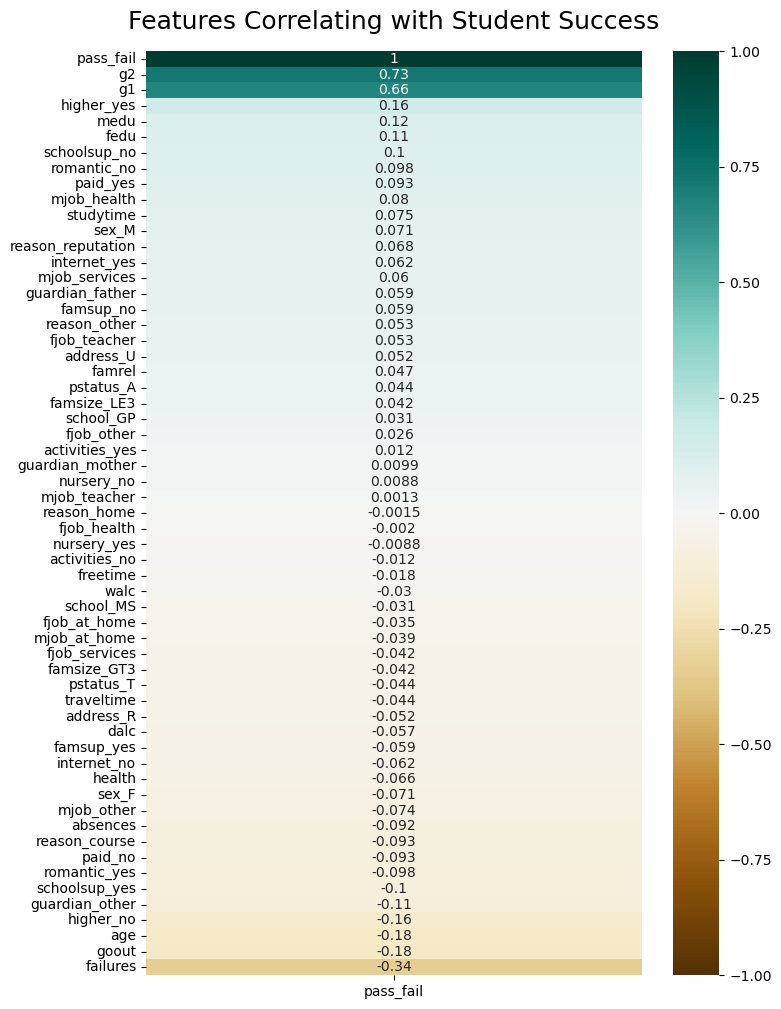

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(math_df.corr()[['pass_fail']].sort_values(by='pass_fail', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Student Success', fontdict={'fontsize':18}, pad=16);

In [12]:
X = math_df.drop(columns = "pass_fail", axis = 1)
y= math_df["pass_fail"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [13]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = X_train_scaled.shape[1]

nodes_layer1 = 100

nodes_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units = nodes_layer1, input_dim = features, activation = "relu"))

# Second hidden layer

nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = "relu"))

# Output layer

nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

C:\Users\katea\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           5,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,061 (54.93 KB)

 Trainable params: 14,061 (54.93 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [16]:
fitted_model = nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5044 - loss: 0.7196
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7027 - loss: 0.5658 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4430 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.3762 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.3190 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.2466  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9206 - loss: 0.2381  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9712 - loss: 0.1766  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.1524 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.1292  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0962 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [17]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - 55ms/step - accuracy: 0.8586 - loss: 0.4351
Loss: 0.43510663509368896, Accuracy: 0.8585858345031738


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [19]:
# Decision Tree Model model
tree = DecisionTreeClassifier(min_samples_leaf=8)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decision Tree Model Score : 0.9459459459459459 , Cross Validation Score : 0.898989898989899


In [20]:
len(list(X_train))

58

In [21]:
# find a good # of estimators

ne=[]
for i in range(1,59):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

0    0.939394
8    0.939394
dtype: float64

In [22]:
# find a good # of min_samples_leaf


ne=[]
for i in range(1,62):
    forest = RandomForestClassifier(n_estimators=26, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

0    0.929293
6    0.929293
dtype: float64

In [23]:
# Random Forest Model
#n_estimators: This parameter specifies the number of decision trees in the forest. 
#min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. It controls the depth of the trees and prevents overfitting by setting a threshold for how many samples should be present at the end nodes.
#Overall, a test accuracy of 0.97 and a cross-validation score of 0.9 indicate that your Random Forest model performs well and generalizes effectively


forest = RandomForestClassifier(n_estimators=18, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Random Forest Model Score : 0.9831081081081081 , Cross Validation Score : 0.9090909090909091


In [24]:
#SVC Model -Support Vector Classifier (SVC) model using scikit-learn's SVC class. 
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.902027027027027 , Cross Validation Score : 0.9090909090909091


In [25]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [26]:
# find optimal number of features to use in the model


ks=[]
for i in range(1,59):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,59)))
ks

1     0.909091
2     0.909091
3     0.909091
4     0.696970
5     0.787879
6     0.838384
7     0.818182
8     0.838384
9     0.818182
10    0.909091
11    0.828283
12    0.818182
13    0.383838
14    0.777778
15    0.757576
16    0.343434
17    0.333333
18    0.848485
19    0.848485
20    0.848485
21    0.888889
22    0.898990
23    0.888889
24    0.888889
25    0.313131
26    0.313131
27    0.313131
28    0.313131
29    0.313131
30    0.313131
31    0.313131
32    0.313131
33    0.828283
34    0.878788
35    0.777778
36    0.767677
37    0.313131
38    0.313131
39    0.313131
40    0.313131
41    0.313131
42    0.313131
43    0.313131
44    0.313131
45    0.383838
46    0.343434
47    0.292929
48    0.303030
49    0.353535
50    0.414141
51    0.424242
52    0.939394
53    0.929293
54    0.898990
55    0.929293
56    0.888889
57    0.919192
58         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

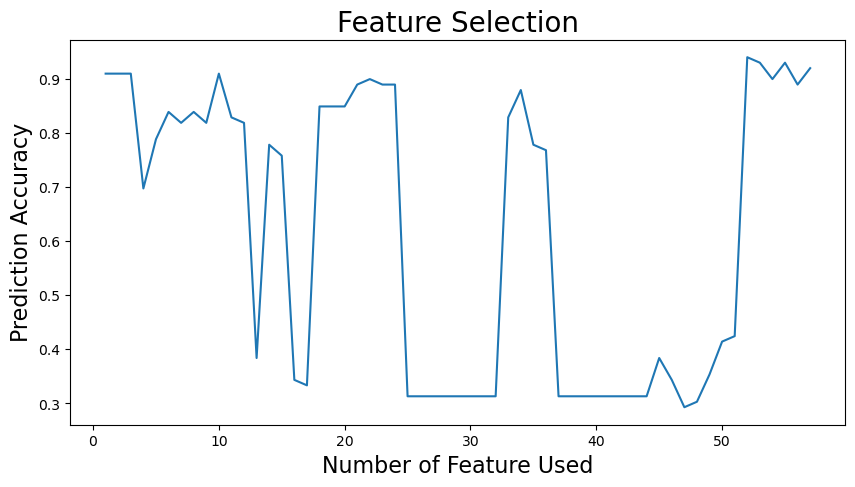

In [27]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selection', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [28]:
ks.where(ks==ks.max()).dropna()

52    0.939394
dtype: float64

In [29]:
# Logistic Regression
#SelectKBest: SelectKBest is a feature selection method in scikit-learn that selects the top k features based on a given scoring function
#k=2: This parameter specifies the number of features to select.
#using scikit-learn's SelectKBest method with the Chi-squared (chi2) scoring function, then fitting a logistic regression model with the selected features
#This code snippet first selects the best 6 features using the Chi-squared scoring function.
#it transforms both the training and test data using these selected features,initializes a logistic regression model and fits it on the transformed training data. Finally, it evaluates the model's performance on both the training and test sets.
#You can adjust the number of features (k parameter) or try different feature selection methods and models based on your specific problem and data characteristics

sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.9222972972972973 , Cross Validation Score : 0.8181818181818182


In [30]:
#Ada Boost Model
#AdaBoost is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. 
#This code creates an AdaBoost classifier with 5 base estimators (decision trees by default). It then fits the model to the training data and evaluates its performance on both the training and test sets.
ada = AdaBoostClassifier(n_estimators=8)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.9391891891891891 , Cross Validation Score : 0.8888888888888888


In [31]:
#Stochastic Gradient Descent Model
#SGD is an optimization algorithm used to minimize a loss function, commonly used in training linear classifiers.
#This code creates an SGD classifier and fits it to the training data. It then evaluates the model's performance on both the training and test sets.
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.9155405405405406 , Cross Validation Score : 0.8787878787878788


In [32]:
portuguese_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [33]:
portuguese_df["g3"] = portuguese_df["g3"].astype(int)
portuguese_df["pass_fail"] = (portuguese_df["g3"] >= 10).astype(int)

In [34]:
portuguese_df = portuguese_df.drop(columns = "g3")

In [35]:
portuguese_df = pd.get_dummies(portuguese_df)

In [36]:
p_X = portuguese_df.drop(columns = "pass_fail", axis = 1)
p_y= portuguese_df["pass_fail"]

p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X, p_y, random_state = 1)

In [37]:
p_scaler = StandardScaler()

p_X_scaler = scaler.fit(p_X_train)

p_X_train_scaled = p_X_scaler.transform(p_X_train)
p_X_test_scaled = p_X_scaler.transform(p_X_test)

In [38]:
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

p_features = p_X_train_scaled.shape[1]

p_nodes_layer1 = 100

p_nodes_layer2 = 80

p_nn = tf.keras.models.Sequential()

# First hidden layer

p_nn.add(tf.keras.layers.Dense(units = nodes_layer1, input_dim = features, activation = "relu"))

# Second hidden layer

p_nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = "relu"))

# Output layer

p_nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
p_nn.summary()

C:\Users\katea\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │           5,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,061 (54.93 KB)

 Trainable params: 14,061 (54.93 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
p_nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [40]:
p_nn_fitted_model = p_nn.fit(p_X_train_scaled, p_y_train, epochs = 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.5013
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8548 - loss: 0.3193 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9157 - loss: 0.2329
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9324 - loss: 0.1956  
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9354 - loss: 0.1558
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9612 - loss: 0.1388 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9682 - loss: 0.1067  
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - loss: 0.0976 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0698
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0640
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0423 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

In [41]:
model_loss, model_accuracy = p_nn.evaluate(p_X_test_scaled,p_y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 29ms/step - accuracy: 0.9018 - loss: 0.6086
Loss: 0.6085606217384338, Accuracy: 0.9018405079841614


In [42]:
# Decision Tree Model model
tree = DecisionTreeClassifier(min_samples_leaf=8)
t= tree.fit(p_X_train, p_y_train)
print("Decision Tree Model Score" , ":" , t.score(p_X_train, p_y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(p_X_test, p_y_test))

Decision Tree Model Score : 0.9526748971193416 , Cross Validation Score : 0.9141104294478528


In [43]:
# find a good # of estimators

ne=[]
for i in range(1,59):
    forest = RandomForestClassifier()
    f = forest.fit(p_X_train, p_y_train)
    fs = f.score(p_X_test, p_y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

2     0.92638
7     0.92638
10    0.92638
12    0.92638
16    0.92638
18    0.92638
25    0.92638
26    0.92638
36    0.92638
41    0.92638
43    0.92638
45    0.92638
50    0.92638
dtype: float64

In [44]:
# find a good # of min_samples_leaf


ne=[]
for i in range(1,59):
    forest = RandomForestClassifier(n_estimators=26, min_samples_leaf=i)
    f = forest.fit(p_X_train, p_y_train)
    fs = f.score(p_X_test, p_y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

3     0.92638
22    0.92638
dtype: float64

In [45]:
# Random Forest Model
#n_estimators: This parameter specifies the number of decision trees in the forest. 
#min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. It controls the depth of the trees and prevents overfitting by setting a threshold for how many samples should be present at the end nodes.
#Overall, a test accuracy of 0.96 and a cross-validation score of 0.75 indicate that your Random Forest model performs well and generalizes effectively


forest = RandomForestClassifier(n_estimators=26, min_samples_leaf=2)
f = forest.fit(p_X_train, p_y_train)
print("Random Forest Model Score" , ":" , f.score(p_X_train, p_y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(p_X_test, p_y_test))

Random Forest Model Score : 0.9897119341563786 , Cross Validation Score : 0.9263803680981595


In [46]:
#SVC Model
svc = SVC()
s= svc.fit(p_X_train, p_y_train)
print("SVC Model Score" , ":" , s.score(p_X_train, p_y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(p_X_test, p_y_test))

SVC Model Score : 0.9362139917695473 , Cross Validation Score : 0.901840490797546


In [47]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [48]:
# find optimal number of features to use in the model


ks=[]
for i in range(1,59):
    sk = SelectKBest(chi2, k=i)
    p_x_new = sk.fit_transform(p_X_train, p_y_train)
    p_x_new_test=sk.fit_transform(p_X_test, p_y_test)
    l = lr.fit(p_x_new, p_y_train)
    ll = l.score(p_x_new_test, p_y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,59)))
ks

1     0.920245
2     0.901840
3     0.907975
4     0.306748
5     0.920245
6     0.920245
7     0.907975
8     0.865031
9     0.865031
10    0.858896
11    0.858896
12    0.184049
13    0.184049
14    0.865031
15    0.852761
16    0.901840
17    0.165644
18    0.165644
19    0.165644
20    0.165644
21    0.165644
22    0.907975
23    0.858896
24    0.865031
25    0.883436
26    0.871166
27    0.858896
28    0.852761
29    0.852761
30    0.865031
31    0.877301
32    0.901840
33    0.165644
34    0.889571
35    0.889571
36    0.165644
37    0.165644
38    0.165644
39    0.165644
40    0.165644
41    0.165644
42    0.165644
43    0.165644
44    0.656442
45    0.889571
46    0.895706
47    0.877301
48    0.914110
49    0.907975
50    0.926380
51    0.926380
52    0.926380
53    0.165644
54    0.165644
55    0.165644
56    0.165644
57    0.914110
58         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

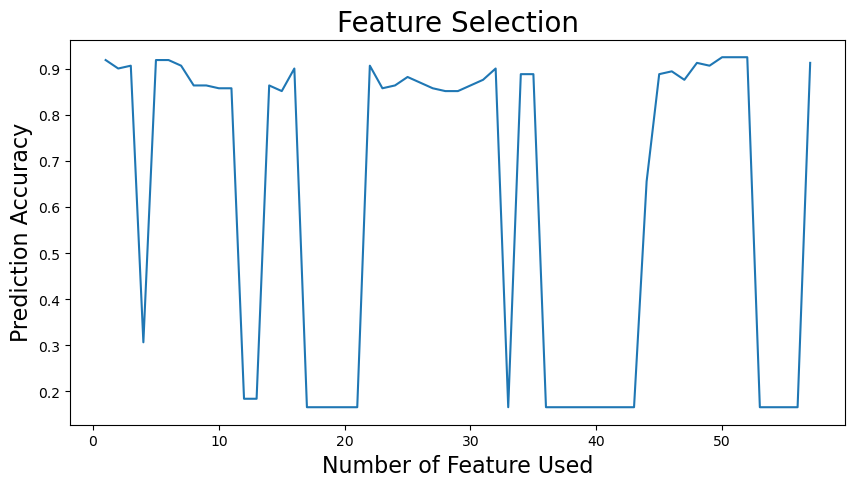

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selection', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [50]:
ks.where(ks==ks.max()).dropna()

50    0.92638
51    0.92638
52    0.92638
dtype: float64

In [55]:
# Logistic Regression
#SelectKBest: SelectKBest is a feature selection method in scikit-learn that selects the top k features based on a given scoring function
#k=2: This parameter specifies the number of features to select.
#using scikit-learn's SelectKBest method with the Chi-squared (chi2) scoring function, then fitting a logistic regression model with the selected features
#This code snippet first selects the best 6 features using the Chi-squared scoring function.
#it transforms both the training and test data using these selected features,initializes a logistic regression model and fits it on the transformed training data. Finally, it evaluates the model's performance on both the training and test sets.
#You can adjust the number of features (k parameter) or try different feature selection methods and models based on your specific problem and data characteristics

sk = SelectKBest(chi2, k=6)
p_x_new = sk.fit_transform(p_X_train,p_y_train)
p_x_new_test=sk.fit_transform(p_X_test,p_y_test)
lr = lr.fit(p_x_new, p_y_train)
print("Logistic Regression Model Score" , ":" , lr.score(p_x_new, p_y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(p_x_new_test, p_y_test))

Logistic Regression Model Score : 0.9403292181069959 , Cross Validation Score : 0.9202453987730062


In [56]:
#Ada Boost Model
#AdaBoost is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. 
#This code creates an AdaBoost classifier with 5 base estimators (decision trees by default). It then fits the model to the training data and evaluates its performance on both the training and test sets.
ada = AdaBoostClassifier(n_estimators=6)
af = ada.fit(p_X_train, p_y_train)
print("Ada Boost Model Score" , ":" , af.score(p_X_train, p_y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(p_X_test, p_y_test))

Ada Boost Model Score : 0.9465020576131687 , Cross Validation Score : 0.9079754601226994


In [53]:
#Stochastic Gradient Descent Model
#SGD is an optimization algorithm used to minimize a loss function, commonly used in training linear classifiers.
#This code snippet creates an SGD classifier and fits it to the training data. It then evaluates the model's performance on both the training and test sets.
sgd = SGDClassifier()
sf = sgd.fit(p_X_train, p_y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(p_X_train, p_y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(p_X_test, p_y_test))

Stochastic Gradient Descent Model Score : 0.9279835390946503 , Cross Validation Score : 0.8895705521472392
